In [14]:
import numpy as np
import pandas as pd
import tifffile as tif

def generate_grid_points(image_path, spacing, threshold, output_path, scaling=(10,10,10)):
    # Load the image data
    img_data = tif.imread(image_path)

    # Generate grid points within the bounds of the image
    x = np.arange(0, img_data.shape[0], spacing)
    y = np.arange(0, img_data.shape[1], spacing)
    z = np.arange(0, img_data.shape[2], spacing)
    grid_points = np.array(np.meshgrid(x, y, z)).T.reshape(-1, 3)

    # Filter grid points based on intensity threshold
    filtered_points = [
        (gz*scaling[2], gy*scaling[1], gx*scaling[0]) for gx, gy, gz in grid_points if img_data[int(gx), int(gy), int(gz)] > threshold
    ]

    # Format the DataFrame to match the example CSV structure
    df = pd.DataFrame(filtered_points, columns=['x', 'y', 'z'])
    df['Pt'] = [f'Pt-{i+1}' for i in range(len(df))]  # Unique identifier
    df['True'] = 'TRUE'
    df['x_repeated'] = df['x']
    df['y_repeated'] = df['y']
    df['z_repeated'] = df['z']

    # Arrange columns in the desired order and save as CSV
    formatted_df = df[['Pt', 'True', 'x', 'y', 'z', 'x_repeated', 'y_repeated', 'z_repeated']]
    formatted_df.columns = ['Pt', 'True', 'X', 'Y', 'Z', 'X_repeated', 'Y_repeated', 'Z_repeated']
    formatted_df.to_csv(output_path, index=False, header=False )

    print(f"CSV saved to {output_path}")

# Example usage
image_path = r'X:\Boaz\I2\atlas10_hemi.tif'
spacing = 100  # example spacing
threshold = 1  # example threshold
output_path = r'X:\Boaz\I2\output_grid_points.csv'
generate_grid_points(image_path, spacing, threshold, output_path)


CSV saved to X:\Boaz\I2\output_grid_points.csv


In [6]:
img_data = tif.imread(image_path)

In [7]:
img_data.shape

(800, 1320, 658)

In [11]:
plane = img_data[400,:,:]

In [12]:
import matplotlib.pyplot as plt

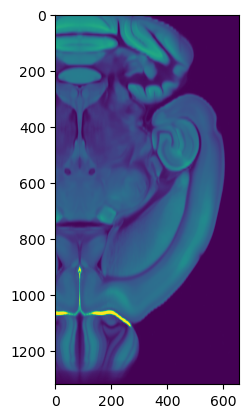

In [13]:
plt.imshow(plane)

In [18]:
np.array(img_data.shape)/64

array([12.5    , 20.625  , 10.28125])